In [1]:
import pandas as pd                                                                 # for importing datasets & analysis
import numpy as np                                                                  # math library
from sklearn.model_selection import StratifiedKFold                                 # K fold cross validation technique
from sklearn import metrics                                                         # Metrics library 
import matplotlib.pyplot as plt                                                     # Data visualization library

In [2]:
train=pd.read_csv(r"C:\Users\yash3.goyal\Desktop\train.csv")                        # read or importing dataset using pandas 
test=pd.read_csv(r"C:\Users\yash3.goyal\Documents\mehak\santander-customer-transaction-prediction\test.csv") # train & test are dataframe 

In [3]:
train.head()                                                                         # display top 5 rows 

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
train.info()                                                                    # information about training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
train.describe()                                                                # display mean,std,count etc. of all columns

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


<Figure size 432x288 with 0 Axes>

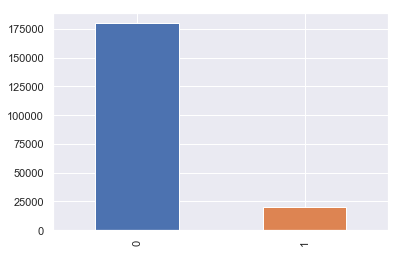

<Figure size 432x288 with 0 Axes>

In [6]:
 # check class distribution among instances
  
 import matplotlib.pyplot as plt    
import seaborn as sns; sns.set()                              #  use matplotlib for plotting, can directly use instead of complex code using matplotlib 
train.target.value_counts().plot(kind="bar")                  # plotting  target(class) column using bar chart 
plt.figure()                                                  # creating figure object


In [7]:
#check missing values
pd.set_option('display.max_rows',500)                                                  # to display all rows & columns 
pd.set_option('display.max_column',500)
train.isna().sum()                                                                     # to detect missing values, 0 if no null values otherwise 1

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0

In [8]:
train.drop(['ID_code', 'target'], axis=1).nunique().sort_values()                # to find unique values of columns and sort it     

var_68        451
var_91       7962
var_108      8525
var_103      9376
var_12       9561
var_148     10608
var_161     11071
var_71      13527
var_25      14853
var_43      15188
var_125     16059
var_166     17902
var_169     18242
var_133     19236
var_15      19810
var_131     21464
var_23      24913
var_34      25164
var_93      26708
var_95      29387
var_42      31592
var_50      32308
var_126     32411
var_98      33266
var_53      33460
var_57      35545
var_28      35859
var_130     36638
var_59      37744
var_6       38599
var_105     39115
var_197     40537
var_144     40595
var_156     40634
var_189     41764
var_114     43084
var_111     46464
var_66      47722
var_9       49417
var_79      53212
var_181     56164
var_162     57396
var_195     57870
var_132     57923
var_192     59065
var_64      59379
var_27      60185
var_112     60482
var_116     63467
var_4       63515
var_121     64695
var_99      69300
var_106     71065
var_78      72254
var_104     72627
var_153   

In [9]:
col_var = train.columns[2:]
df = pd.DataFrame(data=col_var, columns=['feature'])
df['n_train_unique'] = train[col_var].nunique(axis=0).values
df['n_test_unique'] = test[col_var].nunique(axis=0).values

for i in df.index:
    col = df.loc[i, 'feature']
    df.loc[i, 'n_overlap'] = int(np.isin(train[col].unique(), test[col]).sum())         # find common values between train & test
    
   

df.T                                                                                   # returns transpose(rows as columns) dataframe
                       

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
feature,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
n_train_unique,94672,108932,86555,74597,63515,141029,38599,103063,98617,49417,128764,130193,9561,115181,79122,19810,86918,137823,139515,144180,127764,140062,90660,24913,105101,14853,127089,60185,35859,88339,145977,77388,85964,112239,25164,122384,96404,79040,115366,112674,141878,131896,31592,15188,127702,169968,93450,154781,152039,140641,32308,143455,121313,33460,144776,128077,103045,35545,113907,37744,113763,159369,74777,97098,59379,108347,47722,137253,451,110346,153193,13527,110114,142582,161058,129383,139317,106809,72254,53212,136432,79065,144829,144281,133766,108437,140594,125296,84918,103522,157210,7962,110743,26708,89146,29387,148099,158739,33266,69300,150727,122295,146237,9376,72627,39115,71065,137827,8525,112172,106121,46464,60482,116496,43084,86729,63467,164469,143667,112403,158269,64695,121767,129893,91022,16059,32411,95710,98200,113425,36638,21464,57923,19236,131619,140774,156615,144397,117428,137294,121384,134443,128613,94372,40595,108526,84314,137559,10608,148504,83660,109667,95823,73728,119342,127457,40634,126534,144556,112830,156274,11071,57396,123168,122744,119403,17902,140954,97227,18242,113720,125914,143366,128120,134945,92659,142521,85720,145235,90090,123477,56164,149195,117529,145184,120747,98060,157031,108813,41764,114959,94266,59065,110557,97069,57870,125560,40537,94153,149430
n_test_unique,65580,71661,61865,56507,49995,83228,33273,69487,67521,41583,79221,79749,9121,74037,58951,18253,61906,82518,82682,84370,78645,82738,63855,22619,70202,13728,78260,48428,31321,62618,84985,57146,61890,73157,22954,76756,66309,58742,74294,73292,83405,80327,28163,14288,78457,92058,65189,87427,86929,82973,28412,83881,76266,29631,84548,79114,69316,31286,73482,32888,73575,88874,55891,66913,47632,71421,40071,81931,428,72217,86863,12604,72162,83685,89343,79183,82703,71025,54942,44041,8

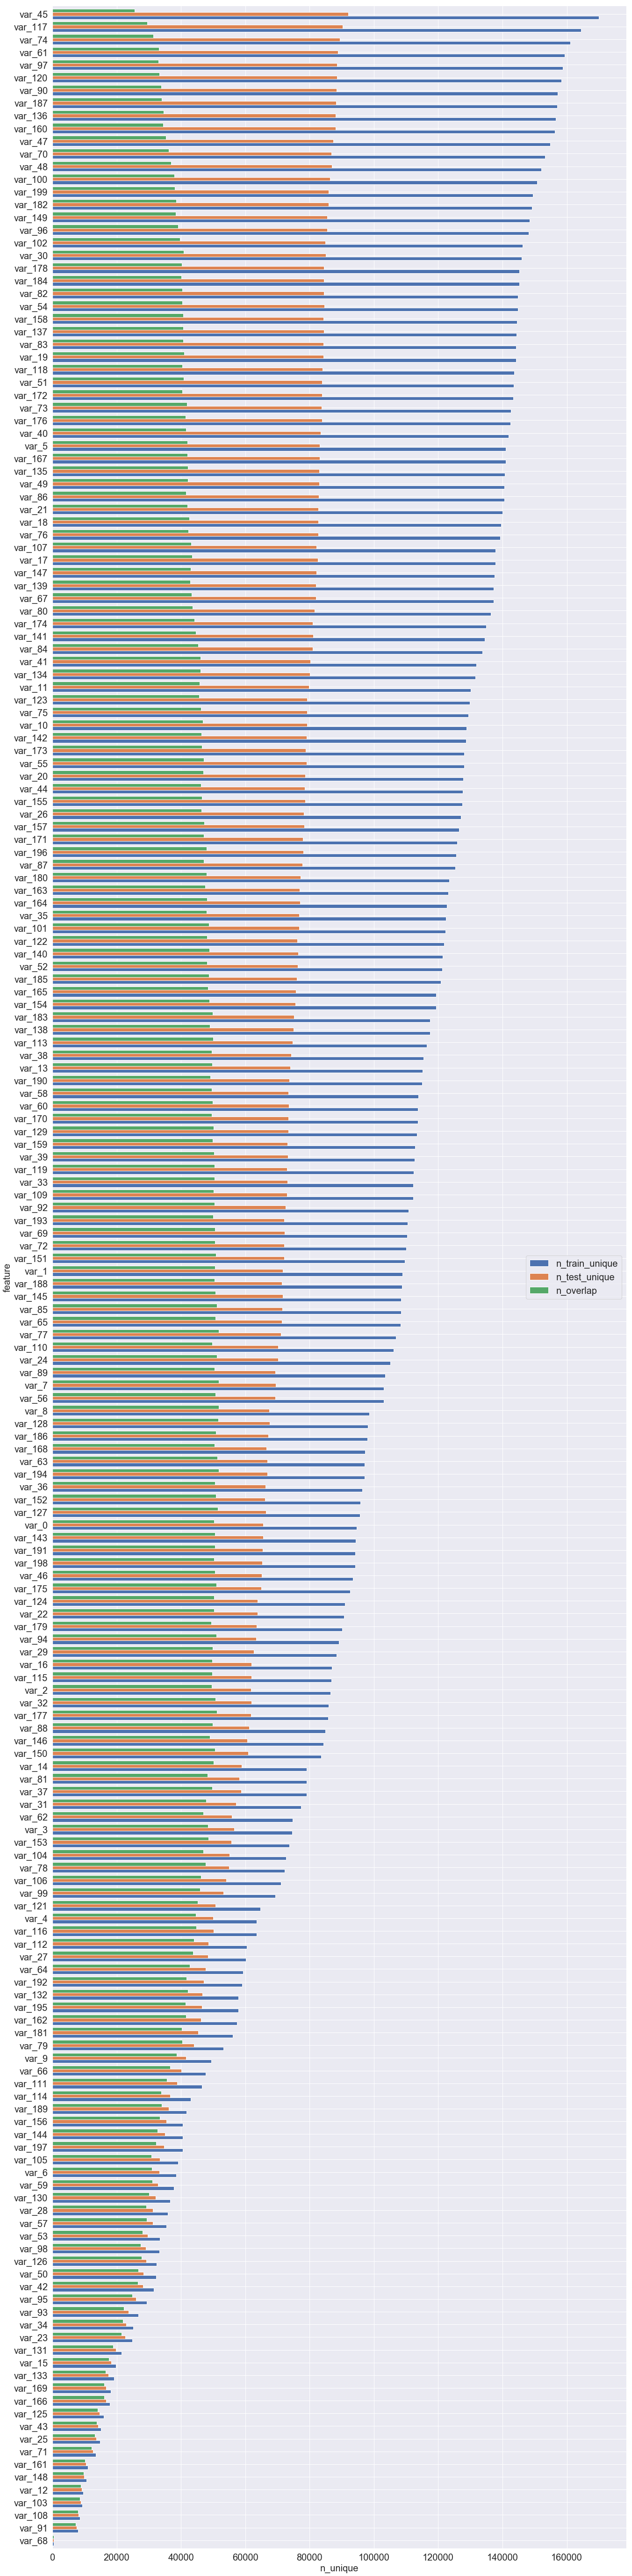

In [28]:
df = df.sort_values(by='n_train_unique').reset_index(drop=True)
df[['n_train_unique', 'n_test_unique', 'n_overlap']].plot(kind='barh' ,figsize=(22, 100), fontsize=20, width=0.8)
plt.yticks(df.index, df['feature'].values)
plt.xlabel('n_unique', fontsize=20)
plt.ylabel('feature', fontsize=20)
plt.legend(loc='center right', fontsize=20)

In [14]:
trainvaluedist = pd.DataFrame(train.iloc[:,2:].max(axis=0),columns=["Max_value"])
trainvaluedist['Min_value'] = train.iloc[:,2:].min(axis=0)
trainvaluedist['Median_value'] = train.iloc[:,2:].median(axis=0)
trainvaluedist.head()

,Max_value,Min_value,Median_value
var_0,20.3150,0.4084,10.52475
var_1,10.3768,-15.0434,-1.60805
var_2,19.3530,2.1171,10.58000
var_3,13.1883,-0.0402,6.82500
var_4,16.6714,5.0748,11.10825


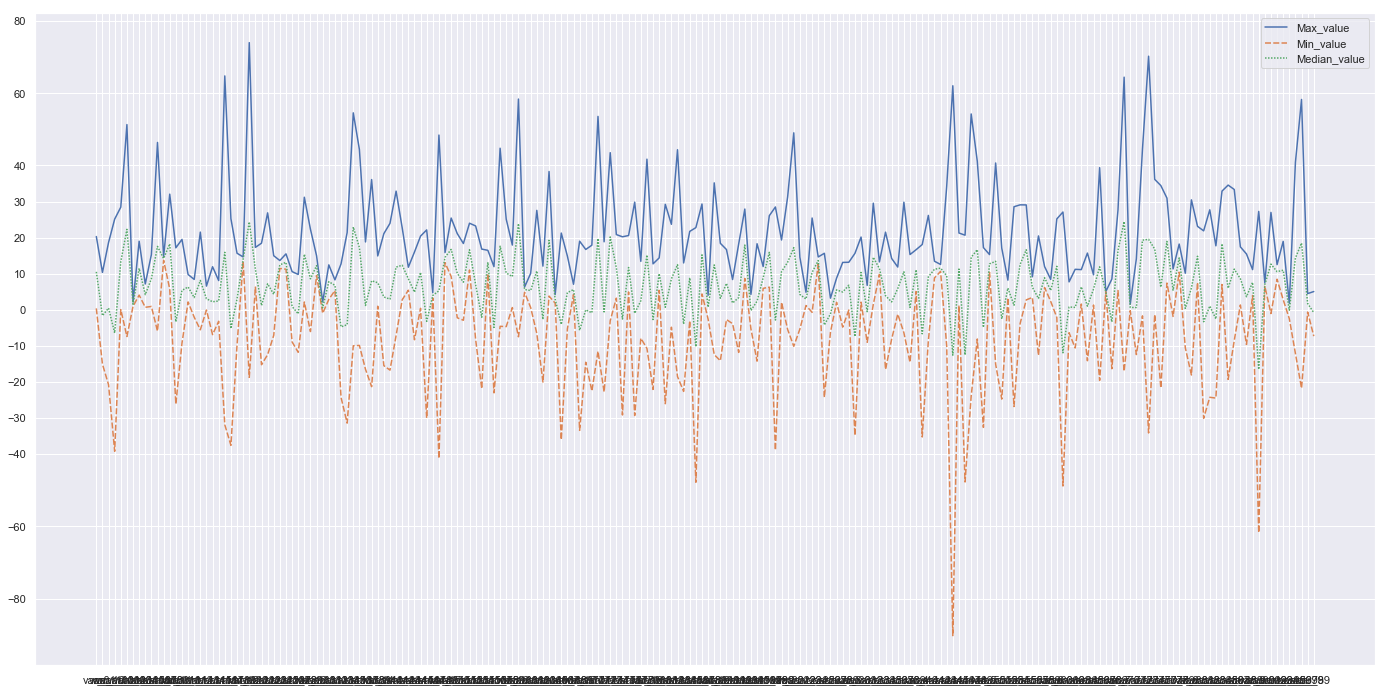

In [31]:
sns.set(rc={'figure.figsize':(24,12)})
line=sns.lineplot(data=trainvaluedist )
line= line.set(yticks=[-80,-60,-40,-30,-20,-10,0,10,20,30,40,60,80])

In [16]:
#checking correlation among variables

traincorr = train.iloc[:,2:].corr()
traincorr.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,-0.001409,0.006798,0.001152,-0.000440,0.002685,-0.003003,-0.001539,0.000129,0.004062,0.003767,0.000524,-0.004678,0.001217,0.003037,0.001259,-0.000783,-0.001055,-0.000318,-0.003824,-0.002385,-0.001962,0.002243,-0.002514,0.000718,-0.001647,-0.001589,0.002835,-0.000225,0.003361,0.004286,-0.001448,0.001140,0.001417,-0.003589,0.000295,0.005504,0.000356,-0.007175,0.000374,0.001557,0.003704,-0.002882,-0.005575,-0.000841,-0.000818,-0.000827,0.001919,-0.000987,-0.000284,-0.004843,0.002300,-0.005071,0.000278,0.001133,-0.000220,0.001620,-0.000036,0.003087,-0.002611,-0.000541,0.003813,-0.001015,0.001022,0.001195,-0.002185,-0.000384,-0.000527,0.004329,-0.004794,-0.002046,-0.004159,0.005662,0.001961,0.001128,-0.001759,0.000722,0.000657,-0.004283,-0.000669,0.001828,-0.002476,0.000251,-0.003118,-0.000987,-0.007402,-0.001754,0.000896,-0.004338,-0.004164,-0.001196,-0.001827,0.000864,-0.002961,0.002217,0.002628,0.002141,0.004496,0.001554,-0.001635,-0.001303,-0.006375,0.002477,-0.002321,-0.003682,0.002822,0.006261,0.002669,0.001057,0.001878,-0.001843,-0.005004,-0.000163,0.000953,-0.000925,0.000189,-0.003217,0.002413,-0.002712,0.002304,-0.001100,0.000189,-0.002975,-0.004248,0.000719,0.000320,-0.000132,-0.002302,-0.007269,0.002156,0.001848,-0.004478,0.002574,0.001678,-0.005587,0.002499,-0.000683,-0.000546,0.001197,0.000953,0.001165,0.003447,0.001939,0.001952,-0.001957,-0.001721,-0.000554,0.001868,0.001267,0.001413,0.001770,0.000543,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,0.002875,0.004778,-0.001977,-0.001303,-0.001544,0.004946,-0.002481,-0.001180,0.000289,0.001246,-0.002255,-0.001519,0.001762,0.003606,0.001417,0.000844,0.004778,-0.004551,-0.002463,0.006328,-0.002244,-0.002811,0.002713,0.001072,-0.002965,0.004293,-0.004466,-0.000122,0.001545,-0.000754,0.001830,0.001240,0.002492,-0.002299,-0.006390,-0.003510,-0.002197,0.004786,0.000111,0.003956,0.000057,0.004052,0.001637,0.005195,-0.004447,0.000314,0.000318,0.002675,-0.003877,0.000610,0.000567,0.000891,0.000417,0.003081,-0

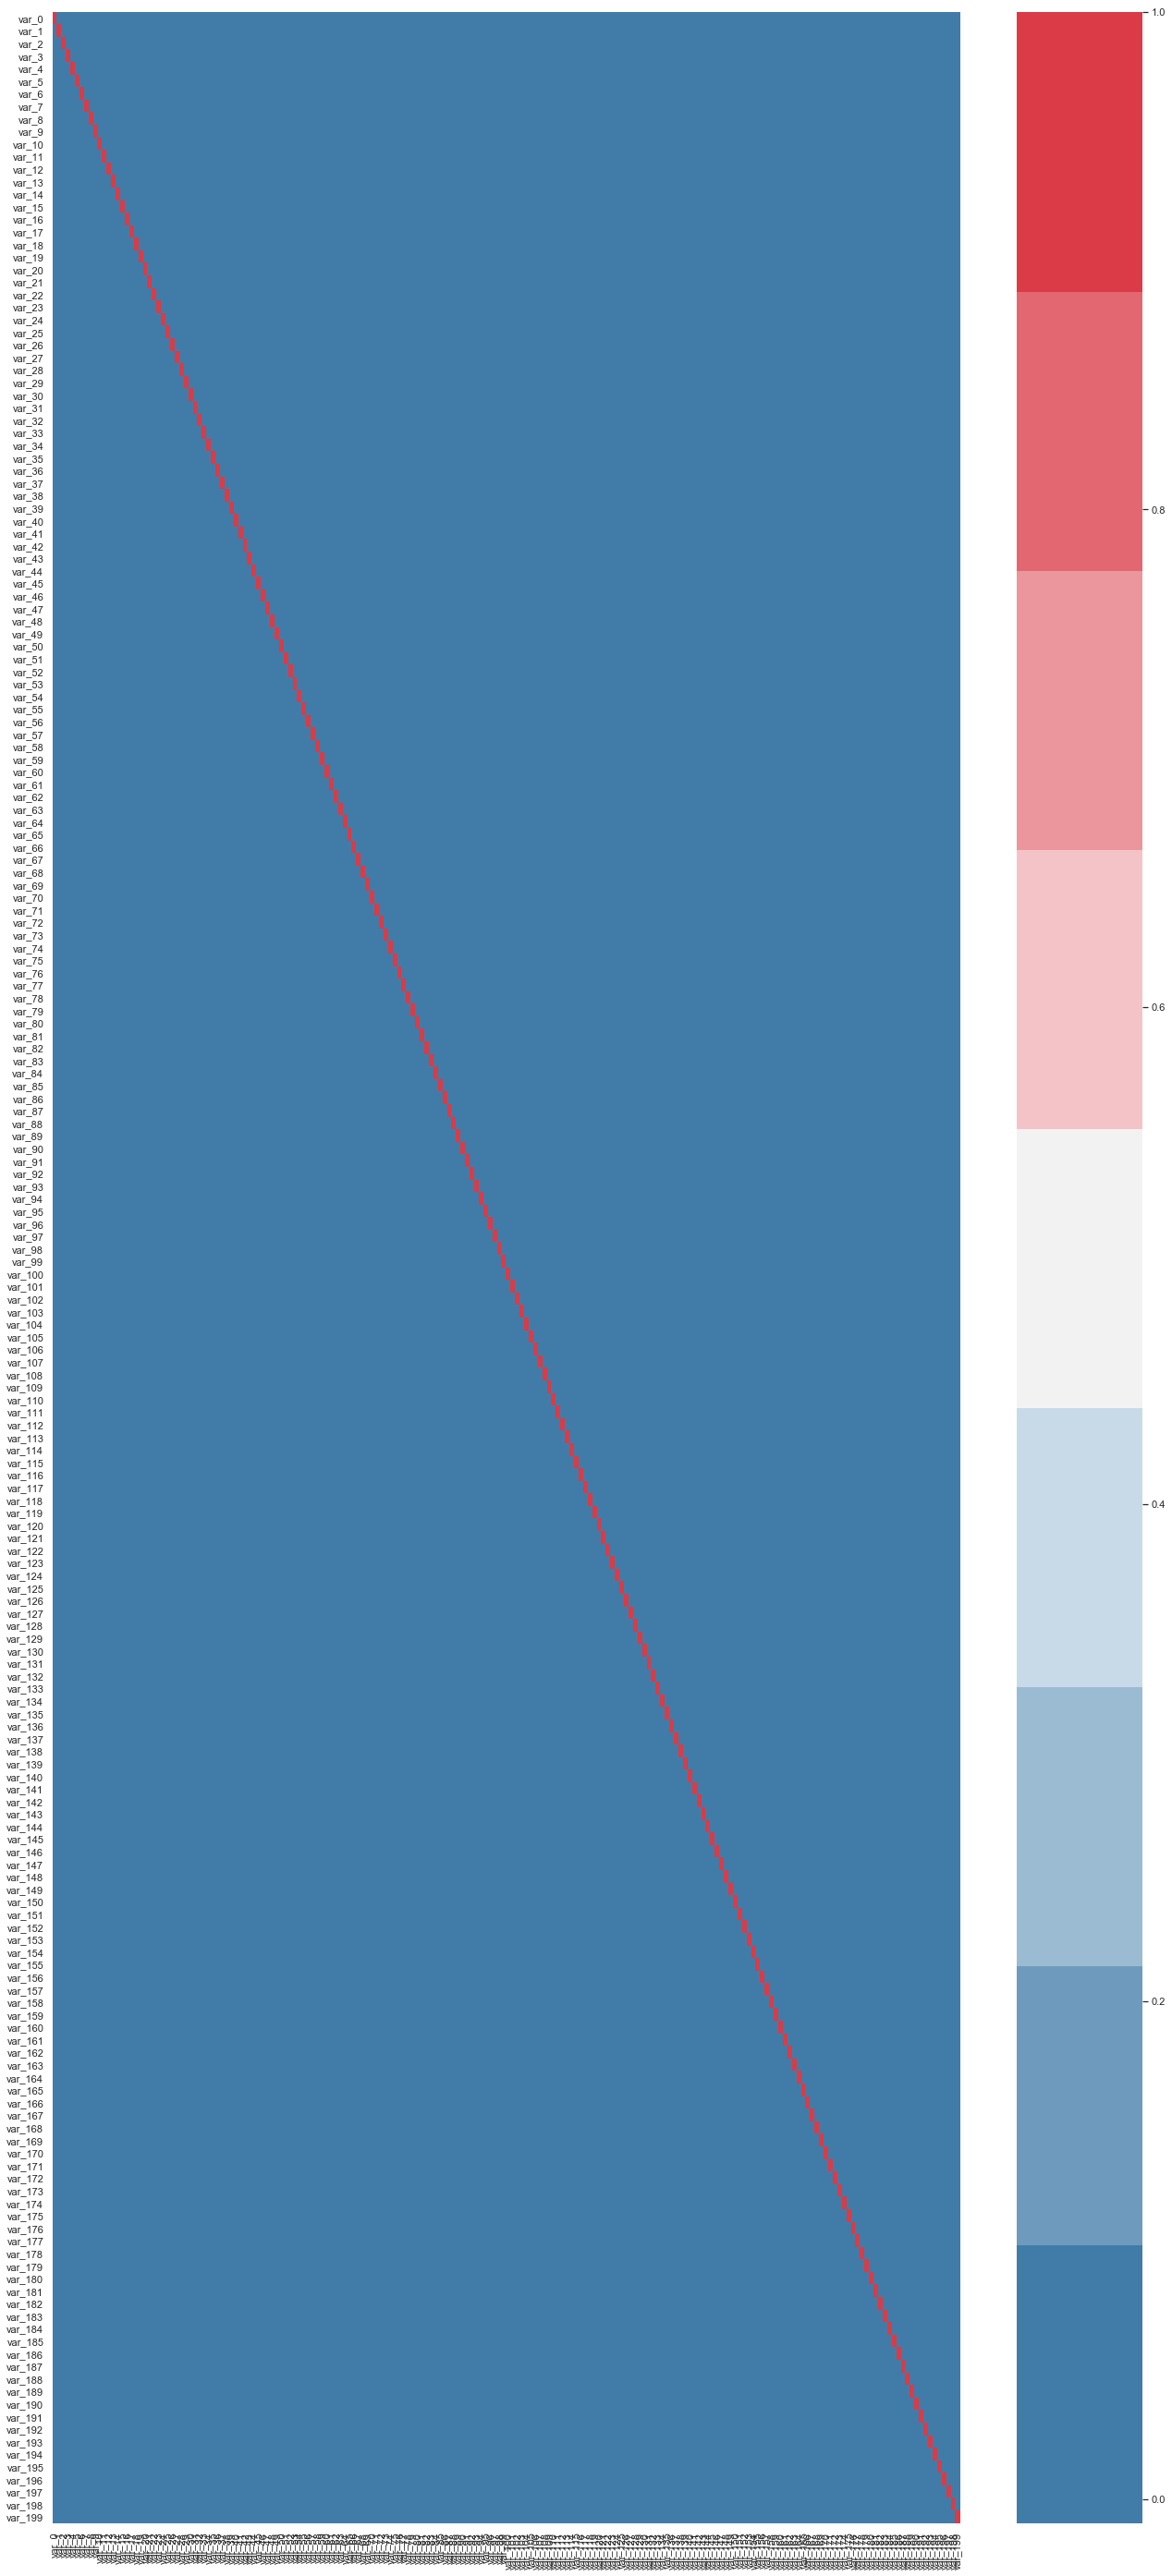

In [17]:
# visualize correlation through heatmap

sns.set(rc={'figure.figsize':(22,50)})
sns.heatmap(traincorr,xticklabels=traincorr.columns,yticklabels=traincorr.columns,cmap=sns.diverging_palette(240, 10, n=9))

In [34]:
from scipy.stats import ks_2samp
from tqdm import tqdm
ks_values =[]
p_values  = []
train_columns = train.iloc[:,2:].columns
for i in tqdm(train_columns):
    ks_values.append(ks_2samp(test[i] , train[i])[0])
    p_values.append(ks_2samp(test[i] , train[i])[1])
p_values_series = pd.Series(p_values, index = train_columns)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:23<00:00,  2.34it/s]


In [39]:
dissimiliar_features= p_values_series[p_values_series <0.05].index     # different sample distribution(total 46)
dissimiliar_features

Index(['var_0', 'var_12', 'var_24', 'var_26', 'var_28', 'var_32', 'var_46',
       'var_50', 'var_53', 'var_56', 'var_62', 'var_67', 'var_74', 'var_81',
       'var_82', 'var_87', 'var_88', 'var_90', 'var_91', 'var_95', 'var_100',
       'var_110', 'var_115', 'var_117', 'var_119', 'var_123', 'var_124',
       'var_129', 'var_135', 'var_137', 'var_138', 'var_146', 'var_155',
       'var_159', 'var_160', 'var_161', 'var_169', 'var_174', 'var_180',
       'var_182', 'var_186', 'var_189', 'var_190', 'var_191', 'var_195',
       'var_197'],
      dtype='object')

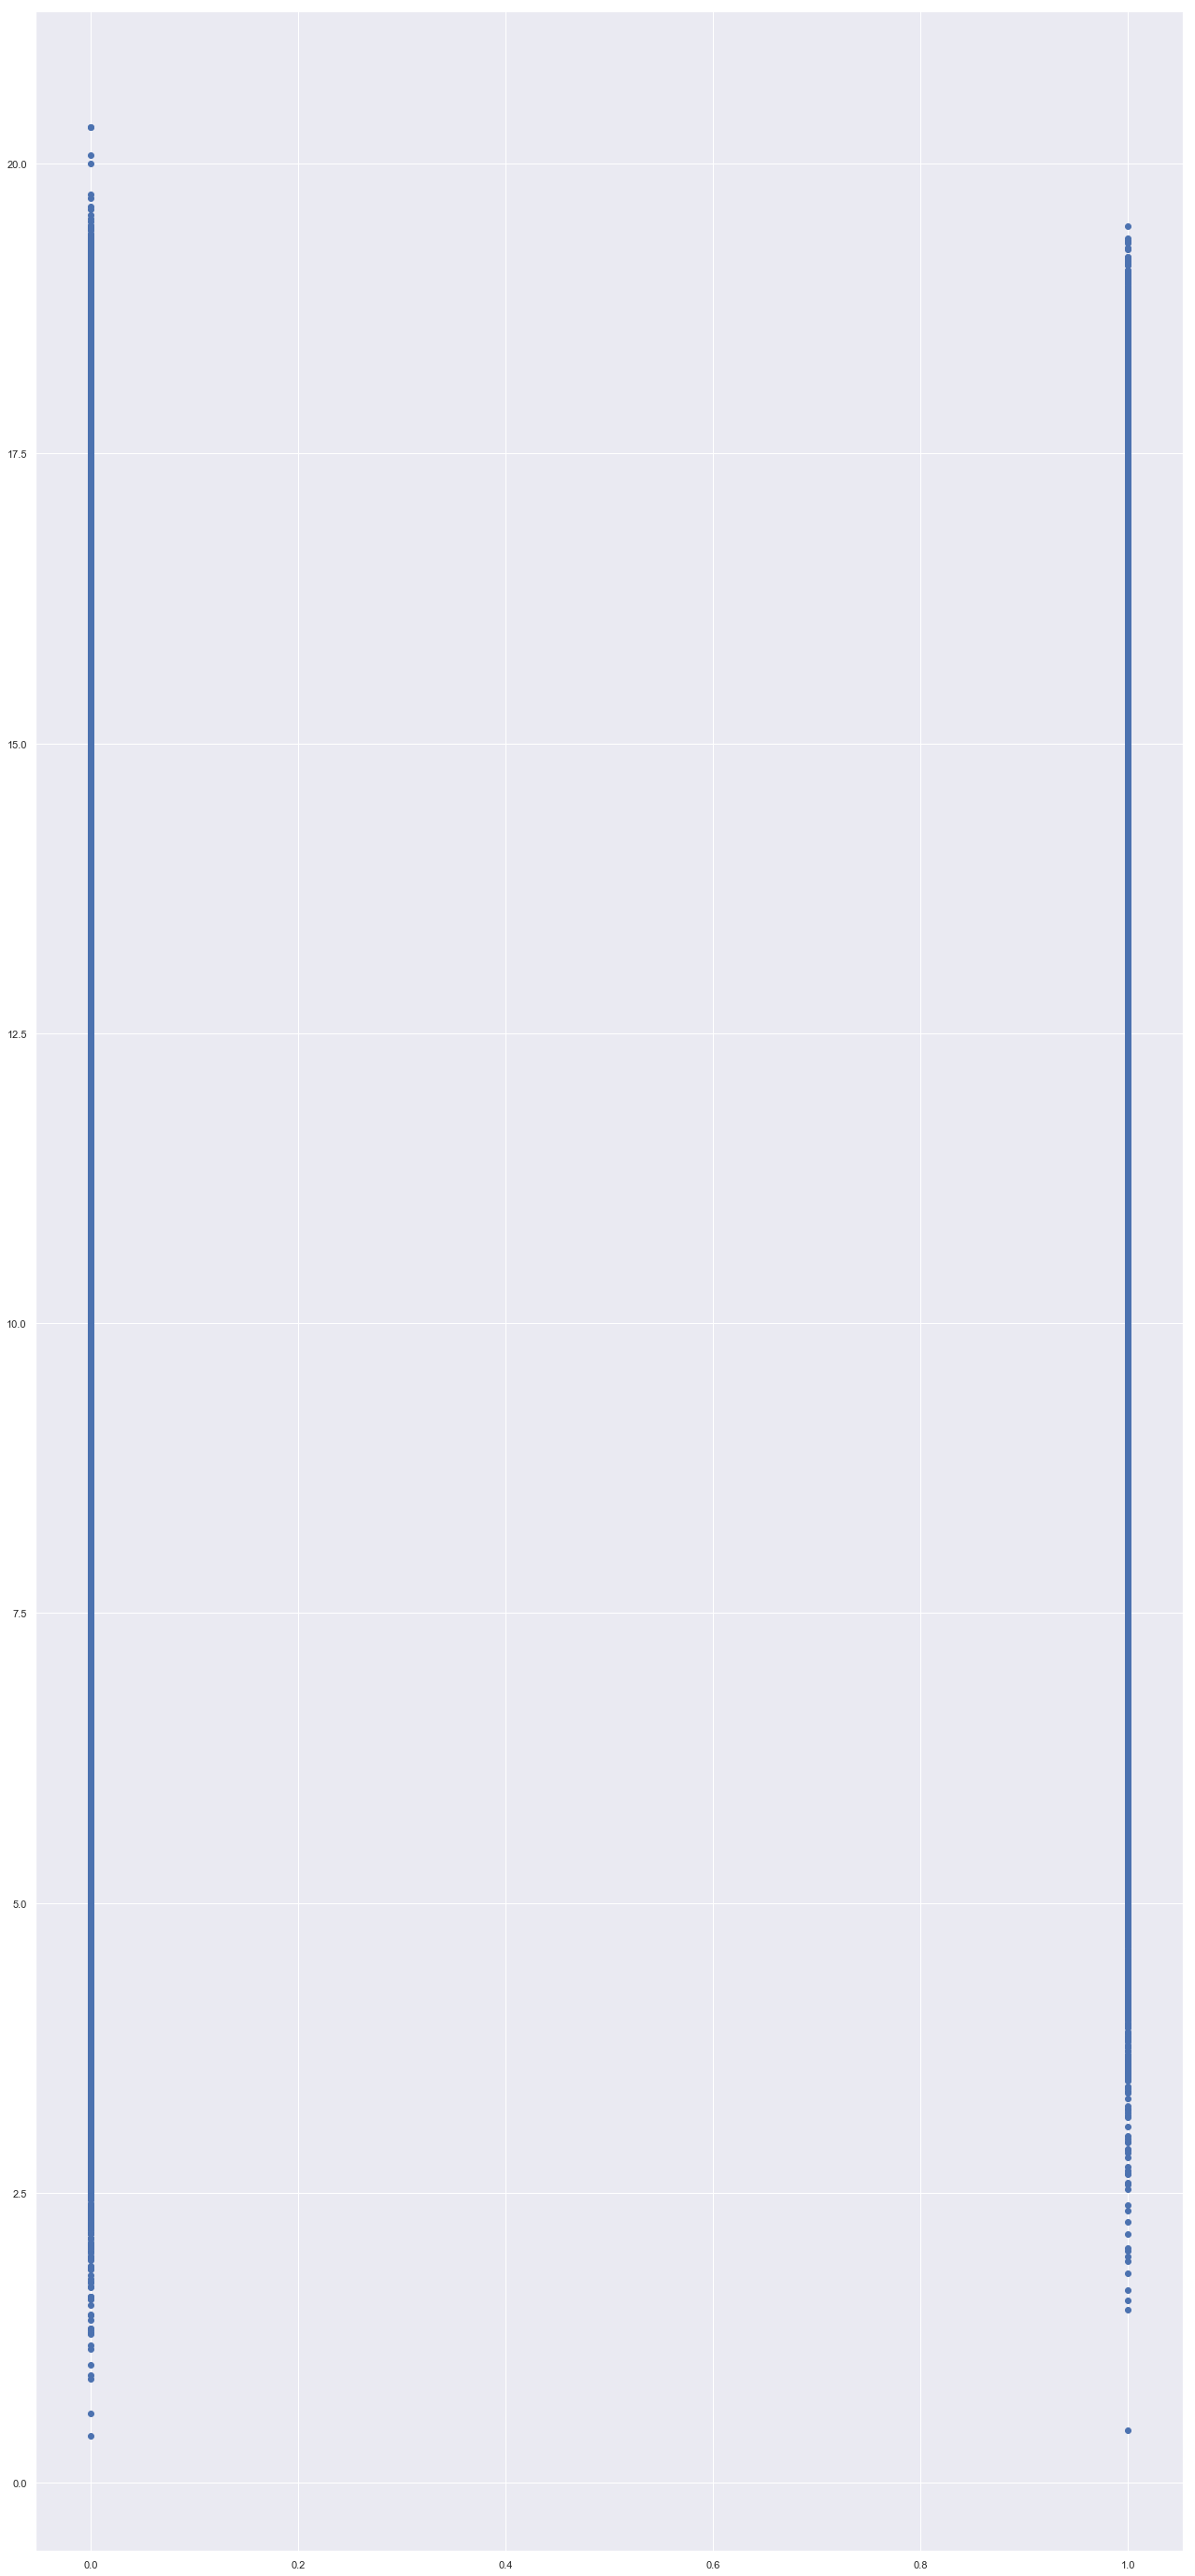

In [50]:
plt.scatter(train.target.values, train.var_0.values)
plt.show()

